In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [3]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',1000)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

In [247]:
ZRI = pd.read_csv('./data/Zip_Zri_MultiFamilyResidenceRental.csv', index_col=0,dtype={'RegionName': 'str'})


In [5]:
#ACS = pd.read_pickle('./data/ZRI_ACS.pkl')

In [6]:
# ACS['ZIP_CODE'] = ACS['ZIP_CODE'].astype(str)

In [7]:
#make all zip codes be 5 digits
# ACS['ZIP_CODE'] = ACS['ZIP_CODE'].str.rjust(5, '0')


In [770]:
ZRI_IRS_LF_MD = pd.read_pickle('./data/ZRI_IRS_LF_MD.pkl')

In [771]:
# load new dataset from bigquery

ACS2017 = pd.read_pickle('./data/acs2017.pkl')

ACS2018 = pd.read_pickle('./data/acs2018.pkl')

In [772]:
ACS2018.columns

Index(['geo_id', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'population_change', 'natural_amenity_rank'],
      dtype='object')

In [773]:
#ACS2017.drop(columns = ['population_change'], inplace=True)

In [774]:
#ACS2018.drop(columns = ['population_change'], inplace=True)

In [775]:
ACS2018[ACS2018['population_change'] > 10000]

,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
167,01066,9.0,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,inf,NaN
428,01960,52564.0,45.6,0.835610,0.026577,0.009779,0.104977,0.4453,37306.0,0.000000,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
536,02366,198.0,46.6,0.459596,0.151515,0.000000,0.388889,NaN,1872.0,NaN,NaN,0.247475,0.040404,0.065657,0.000000,inf,NaN
1003,03911,52.0,69.9,0.750000,0.000000,0.000000,0.250000,0.2557,46769.0,NaN,NaN,0.000000,0.000000,0.519231,0.230769,inf,NaN
1310,04741,4.0,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,inf,NaN
2387,08246,87.0,79.5,0.597701,0.000000,0.402299,0.000000,0.1230,18814.0,NaN,NaN,0.689655,0.000000,0.000000,0.000000,inf,NaN
2402,08320,1091.0,37.7,0.104491,0.634280,0.003666,0.221815,NaN,10509.0,NaN,NaN,0.139322,0.023831,0.030247,0.000000,inf,NaN
2815,11042,522.0,85.9,0.565134,0.293103,0.055556,0.070881,NaN,22557.0,NaN,NaN,0.388889,0.030651,0.057471,0.057471,inf,4.0
3277,12450,154.0,75.0,1.000000,0.000000,0.000000,0.000000,0.0404,27064.0,NaN,NaN,0.493506,0.116883,0.389610,0.000000,inf,4.0
3490,12862,5.0,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,inf,3.0


In [776]:
ACS2017.head()

,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
0,00601,17599.0,38.9,0.003352,0.000000,0.000000,0.996250,0.5706,7041.0,0.025037,32.6,0.160918,0.041650,0.101540,0.015285,-0.620499,NaN
1,00602,39209.0,40.9,0.040883,0.000587,0.000000,0.936928,0.4973,8978.0,0.092316,31.5,0.138132,0.093091,0.094213,0.027978,0.484571,NaN
2,00603,50135.0,40.4,0.010133,0.003211,0.003331,0.974668,0.5613,10897.0,0.086020,29.1,0.169263,0.048768,0.116845,0.032014,0.490649,NaN
3,00606,6304.0,42.8,0.001904,0.000000,0.000000,0.998096,0.4785,5960.0,0.015748,44.5,0.192259,0.039499,0.050920,0.012214,11.146435,NaN
4,00610,27590.0,41.4,0.020660,0.000544,0.000000,0.973179,0.4527,9266.0,0.154229,33.4,0.188655,0.072019,0.082204,0.018123,2.621685,NaN


In [777]:
ACS2017['geo_id'] = ACS2017['geo_id'].astype(str)
#make all zip codes be 5 digits
ACS2017['geo_id'] = ACS2017['geo_id'].str.rjust(5, '0')


In [778]:
ZRI_IRS_LF_MD_17 = ZRI_IRS_LF_MD[ZRI_IRS_LF_MD.Year == 2017]

In [779]:
#merge ZRI_IRS_LF_MD_ACS 2017 to make X train
X_train17 = pd.merge(ZRI_IRS_LF_MD_17, ACS2017, right_on=['geo_id'], left_on =['ZIPCODE'], how='left')


In [780]:
X_train17.shape

(25968, 40)

In [781]:
#dropping duplicates 
X_train17 = X_train17.drop_duplicates()
X_train17.shape #checking shape

(25968, 40)

In [782]:
ZRI_IRS_LF_MD_18 = ZRI_IRS_LF_MD[ZRI_IRS_LF_MD.Year == 2018]

In [783]:
ACS2018['geo_id'] = ACS2018['geo_id'].astype(str)
#make all zip codes be 5 digits
ACS2018['geo_id'] = ACS2018['geo_id'].str.rjust(5, '0')

In [784]:
#merge ZRI_IRS_LF_MD_ACS 2017 to make X train
y_train18 = pd.merge(ZRI_IRS_LF_MD_18, ACS2018, right_on=['geo_id'], left_on =['ZIPCODE'], how='left')


In [785]:
y_train18.shape

(25968, 40)

In [786]:
y_train18[y_train18.total_pop == 0]

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank


In [787]:
y_train18[y_train18.population_change >= 10000]

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
365,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-01-01,1811.0,1,2018,winter,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,2.0,1.1,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
2529,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-02-01,1794.0,2,2018,winter,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.6,1.0,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
4693,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-03-01,1786.0,3,2018,spring,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.7,0.9,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
6857,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-04-01,1796.0,4,2018,spring,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.5,0.9,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
9021,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-05-01,1806.0,5,2018,winter,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.6,0.9,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
11185,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-06-01,1808.0,6,2018,summer,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.4,0.8,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
13349,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-07-01,1804.0,7,2018,summer,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.3,0.7,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
15513,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-08-01,1801.0,8,2018,winter,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.6,0.8,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
17677,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-09-01,1800.0,9,2018,fall,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.5,0.8,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN
19841,01960,Peabody,MA,Boston-Cambridge-Newton,Essex County,307,2018-10-01,1799.0,10,2018,fall,338322.666667,341550.333333,234058.333333,173.333333,5300.666667,25009,"427,449","412,710","14,739",3.4,1.7,0.9,01960,52564.0,45.6,0.83561,0.026577,0.009779,0.104977,0.4453,37306.0,0.0,33.0,0.213264,0.069116,0.162963,0.064531,inf,NaN


In [788]:
X_train17.columns

Index(['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'FIPSCode',
       'Labor\nForce', 'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'geo_id', 'total_pop', 'median_age',
       'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'population_change', 'natural_amenity_rank'],
      dtype='object')

In [789]:
X_train17[X_train17.total_pop == 0]

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank


In [790]:
#2019 data 
ZRI_IRS_LF_MD_19 = ZRI_IRS_LF_MD[ZRI_IRS_LF_MD.Year == 2019]

In [791]:
ZRI_IRS_LF_MD_19.head()

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90
207744,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2019-01-01,3509.0,1,2019,winter,NaN,NaN,NaN,NaN,NaN,36061,"911,638","879,665","31,973",3.5,0.7,0.5
207745,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2019-01-01,1723.0,1,2019,winter,NaN,NaN,NaN,NaN,NaN,17031,"2,594,759","2,496,526","98,233",3.8,2.2,1.2
207746,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2019-01-01,3515.0,1,2019,winter,NaN,NaN,NaN,NaN,NaN,36061,"911,638","879,665","31,973",3.5,0.7,0.5
207747,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2019-01-01,1255.0,1,2019,winter,NaN,NaN,NaN,NaN,NaN,48157,"392,275","378,653","13,622",3.5,NaN,NaN
207748,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2019-01-01,1255.0,1,2019,winter,NaN,NaN,NaN,NaN,NaN,48201,"2,317,346","2,228,703","88,643",3.8,3.5,1.2


In [792]:
# ACS.columns

In [793]:
# ACS.rename(columns={"ZIP_CODE": "ZIPCODE", 'date':'Year-Month', 'year':'Year'}, inplace=True)
# #datetime
# ACS['Year-Month'] = pd.to_datetime(ACS['Year-Month'])

# ACS_17 = ACS[ACS.Year ==2017]

In [794]:
ZRI_IRS_LF_MD_17.columns

Index(['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'FIPSCode',
       'Labor\nForce', 'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90'],
      dtype='object')

In [795]:
ACS_17.columns


Index(['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Year', 'ZCTA', 'RentalVacancyRate_x',
       'RentalVacancyRate_y', 'white', 'black', 'asian', 'NHOPI',
       'hispanic_latino', '20_to_24', '25_to_34', '35_to_44', '45_to_54',
       '55_to_59', '60_to_64', '65_to_74', '75_to_85', '85_over', 'ZCTA',
       'Population'],
      dtype='object')

In [796]:
ZRI_IRS_LF_MD_17.head(1)

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90
155808,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2017-01-01,3771.0,1,2017,winter,1.222721e+06,1247542.5,763333.333333,208.333333,138435.833333,36061,"916,625","878,936","37,689",4.1,0.8,0.7


In [797]:
ACS_17.head(1)

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Year,ZCTA,RentalVacancyRate_x,RentalVacancyRate_y,white,black,asian,NHOPI,hispanic_latino,20_to_24,25_to_34,35_to_44,45_to_54,55_to_59,60_to_64,65_to_74,75_to_85,85_over,ZCTA,Population
141436,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2017-01-01,3771.0,2017,NaN,NaN,1.1,64.4,12.5,9.8,0.0,24.1,6.6,18.0,13.2,13.1,5.9,7.3,11.5,4.8,3.0,10025,94382


In [798]:
# merge ZRI_IRS_LF_MD_ACS 2017 to make X train
# X_train17 = pd.merge(ZRI_IRS_LF_MD_17, ACS_17, on=['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Year-Month', 'value', 'Year'], how='left')


In [799]:
# X_train17.shape

In [800]:
#dropping duplicates 
X_train17 = X_train17.drop_duplicates()
X_train17.shape #checking shape

(25968, 40)

In [801]:
#ACS_18 = ACS[ACS.Year ==2018]

In [802]:
#merge ZRI_IRS_LF_MD_ACS 2018 Y train
#y_train18 = pd.merge(ZRI_IRS_LF_MD_18, ACS_18, on=['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Year-Month', 'value', 'Year'], how='left')


In [803]:
#y_train18.shape

In [804]:
# #dropping duplicates 
# y_train18 = y_train18.drop_duplicates()
# y_train18.shape #checking shape

In [696]:
# y_train18.head()

# Cleaning columns 
- removing unnecessary columns

In [805]:
X_train17.columns

Index(['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'FIPSCode',
       'Labor\nForce', 'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'geo_id', 'total_pop', 'median_age',
       'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'population_change', 'natural_amenity_rank'],
      dtype='object')

In [806]:
season_2017 = X_train17.groupby(['Season']).agg({"value": 'median'})
season_all = ZRI_IRS_LF_MD.groupby(['Season']).agg({"value": 'median'})

In [807]:
season_all

,value
Season,
fall,1384.0
spring,1351.0
summer,1365.0
winter,1373.0


In [808]:
#making season ordinal 
X_train17.Season = X_train17.Season.replace({'fall':1,'winter':2, 'summer':3, 'spring':4})

In [809]:
#X_train17.head()

In [810]:
X_train['AGIncome'] = (X_train['AGIncome']*1000)/X_train['total_pop']
X_train['TotIncome'] = (X_train['TotIncome']*1000)/X_train['total_pop']
X_train['SalariesWages'] = (X_train['SalariesWages']*1000)/X_train['total_pop']
X_train['NumUnemply'] =(X_train['NumUnemply']*1000)/X_train['total_pop']
X_train['TotTaxes'] = (X_train['TotTaxes']*1000)/X_train['total_pop']
X_train = X_train.replace(np.nan, 0)

In [811]:
#drop columns to test
X_train17.drop(columns = ['City', 'State', 'value', 'Metro', 'CountyName','Month', 'Year'], inplace=True)
X_train17.drop(columns = ['Labor\nForce','Employed', 'Unemployed'], inplace=True)

X_train17.drop(columns = ['Year-Month'], inplace=True)


X_train17.columns


Index(['ZIPCODE', 'SizeRank', 'Season', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'TotTaxes', 'FIPSCode',
       'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90', 'geo_id',
       'total_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop',
       'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'population_change', 'natural_amenity_rank'],
      dtype='object')

In [812]:
X_train17.drop(columns = ['ZIPCODE', 'FIPSCode'], inplace=True)

In [813]:
X_train17.columns


Index(['SizeRank', 'Season', 'AGIncome', 'TotIncome', 'SalariesWages',
       'NumUnemply', 'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'geo_id', 'total_pop', 'median_age', 'white_pop',
       'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'population_change', 'natural_amenity_rank'],
      dtype='object')

In [814]:
X_train17.drop(columns = ['geo_id'], inplace=True)

In [815]:
X_train17.drop(columns = ['SizeRank'], inplace=True)

In [816]:
X_train17.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'population_change', 'natural_amenity_rank'],
      dtype='object')

### Train Test 

In [817]:
X_train = X_train17.copy()

In [818]:
###y_train18 = y_train18.dropna(subset=['value'])

In [819]:
y_train = y_train18['value']

In [820]:
y_train.head()

0    3727.0
1    1735.0
2    3609.0
3    1214.0
4    1214.0
Name: value, dtype: float64

In [821]:
X_train.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'population_change', 'natural_amenity_rank'],
      dtype='object')

In [822]:
X_train17.shape

(25968, 25)

In [823]:
X_train.shape

(25968, 25)

In [824]:
y_train.shape

(25968,)

In [825]:
trainingset1 = pd.concat([X_train, y_train], axis=1)

In [826]:
trainingset1 = trainingset1.dropna(subset=['value'])

In [827]:
trainingset1.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank,value
0,2,1.222721e+06,1.247542e+06,7.633333e+05,208.333333,138435.833333,4.1,0.8,0.7,94382.0,41.7,0.540569,0.090324,0.097815,0.240713,0.5942,68995.0,0.044332,29.4,0.063561,0.027569,0.227130,0.176167,3.516101,3.0,3727.0
1,2,8.573410e+05,8.710963e+05,6.170520e+05,161.666667,46717.166667,5.1,2.2,1.9,70103.0,31.2,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,2.035550,3.0,1735.0
2,2,2.270603e+06,2.299776e+06,1.031574e+06,145.000000,303624.166667,4.1,0.8,0.7,61514.0,42.6,0.720308,0.033488,0.108479,0.109406,0.5630,114641.0,0.053383,23.9,0.047436,0.017541,0.257990,0.245017,1.228203,3.0,3609.0
3,2,1.021157e+06,1.032314e+06,8.244232e+05,300.000000,51148.166667,4.6,NaN,NaN,105854.0,34.8,0.511828,0.071570,0.180296,0.210082,0.3699,48249.0,0.057867,26.5,0.051911,0.042341,0.223761,0.111106,0.922800,3.0,1214.0
4,2,1.021157e+06,1.032314e+06,8.244232e+05,300.000000,51148.166667,5.1,3.5,1.7,105854.0,34.8,0.511828,0.071570,0.180296,0.210082,0.3699,48249.0,0.057867,26.5,0.051911,0.042341,0.223761,0.111106,0.922800,3.0,1214.0


In [828]:
#replace nan with 0 
X_train = X_train.replace(np.nan, 0)
#y_train = y_train.replace(np.nan, 0)

In [829]:
X_train = trainingset1.drop(columns = ['value'])

In [830]:
y_train = trainingset1['value']

In [831]:
X_train.shape

(21718, 25)

In [832]:
y_train.shape

(21718,)

In [833]:
X_train = X_train.apply(pd.to_numeric)

In [834]:
X_train = X_train.replace(np.nan, 0)
X_train.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
0,2,1.222721e+06,1.247542e+06,7.633333e+05,208.333333,138435.833333,4.1,0.8,0.7,94382.0,41.7,0.540569,0.090324,0.097815,0.240713,0.5942,68995.0,0.044332,29.4,0.063561,0.027569,0.227130,0.176167,3.516101,3.0
1,2,8.573410e+05,8.710963e+05,6.170520e+05,161.666667,46717.166667,5.1,2.2,1.9,70103.0,31.2,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,2.035550,3.0
2,2,2.270603e+06,2.299776e+06,1.031574e+06,145.000000,303624.166667,4.1,0.8,0.7,61514.0,42.6,0.720308,0.033488,0.108479,0.109406,0.5630,114641.0,0.053383,23.9,0.047436,0.017541,0.257990,0.245017,1.228203,3.0
3,2,1.021157e+06,1.032314e+06,8.244232e+05,300.000000,51148.166667,4.6,0.0,0.0,105854.0,34.8,0.511828,0.071570,0.180296,0.210082,0.3699,48249.0,0.057867,26.5,0.051911,0.042341,0.223761,0.111106,0.922800,3.0
4,2,1.021157e+06,1.032314e+06,8.244232e+05,300.000000,51148.166667,5.1,3.5,1.7,105854.0,34.8,0.511828,0.071570,0.180296,0.210082,0.3699,48249.0,0.057867,26.5,0.051911,0.042341,0.223761,0.111106,0.922800,3.0


# look into features correlations 

In [727]:
corr = pd.concat([X_train, y_train], axis=1).corr()
corr

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank,value
Season,1.000000,0.074079,0.074103,0.087043,0.080283,0.042442,0.155911,0.083502,0.108404,0.111781,0.168288,0.112989,0.054081,0.057659,0.068368,0.171469,0.111074,0.093162,0.165535,0.121745,0.132503,0.113525,0.095097,0.023186,0.127134,-0.013848
AGIncome,0.074079,1.000000,0.999988,0.925826,0.308928,0.888155,0.298235,0.094962,0.095692,0.460353,0.449447,0.407658,-0.093692,0.343819,0.046835,0.443082,0.753247,0.156599,0.267383,-0.021147,0.167327,0.628233,0.634977,0.046792,0.317540,0.011160
TotIncome,0.074103,0.999988,1.000000,0.925837,0.308170,0.888235,0.298184,0.094704,0.095274,0.459656,0.449768,0.409034,-0.094393,0.343399,0.045893,0.443572,0.754232,0.156641,0.267310,-0.022130,0.167111,0.629536,0.636193,0.046475,0.317926,0.011161
SalariesWages,0.087043,0.925826,0.925837,1.000000,0.464063,0.771551,0.358466,0.117797,0.123021,0.631590,0.495460,0.385687,-0.047195,0.436636,0.119124,0.469000,0.698081,0.135184,0.335933,0.053948,0.240035,0.632061,0.628220,0.076993,0.389496,0.014866
NumUnemply,0.080283,0.308928,0.308170,0.464063,1.000000,0.190672,0.529688,0.217502,0.195838,0.727719,0.397953,0.078215,0.111958,0.250016,0.438887,0.379491,0.156840,0.062457,0.456226,0.396003,0.321577,0.140440,0.053988,0.109074,0.469570,0.007248
TotTaxes,0.042442,0.888155,0.888235,0.771551,0.190672,1.000000,0.163762,-0.011807,0.040258,0.247329,0.280340,0.279056,-0.107146,0.293611,-0.047721,0.282334,0.643700,0.029520,0.127952,-0.107010,0.021287,0.463607,0.525711,0.016475,0.196017,0.015993
Unemploy-\nment Rate\n(%),0.155911,0.298235,0.298184,0.358466,0.529688,0.163762,1.000000,0.586414,0.581512,0.589888,0.803660,0.441022,0.379901,0.213608,0.413264,0.854860,0.458057,0.487990,0.845678,0.679890,0.612672,0.431860,0.372756,0.140770,0.578187,-0.011219
MortDeliq30-89,0.083502,0.094962,0.094704,0.117797,0.217502,-0.011807,0.586414,1.000000,0.863842,0.337548,0.429431,0.132951,0.304780,0.059977,0.349203,0.494077,0.189371,0.326429,0.492508,0.446544,0.336042,0.187878,0.122009,0.046034,0.263033,-0.001829
MortDeliq90,0.108404,0.095692,0.095274,0.123021,0.195838,0.040258,0.581512,0.863842,1.000000,0.345161,0.427257,0.079770,0.352144,0.111909,0.288417,0.467014,0.163814,0.253760,0.492447,0.495701,0.340968,0.134131,0.110150,0.069593,0.171000,0.003602
total_pop,0.111781,0.460353,0.459656,0.631590,0.727719,0.247329,0.589888,0.337548,0.345161,1.000000,0.556444,0.186250,0.219314,0.275650,0.510236,0.567002,0.227957,0.215303,0.644953,0.505322,0.438025,0.235959,0.155439,0.153831,0.485716,0.011913


In [48]:
#sns.heatmap(corr) 

In [182]:
#removing outliers
y_train18_2 = y_train18[y_train18.value < 6000]

In [185]:
#X_train['SalariesWages'] = (X_train['SalariesWages']*1000)/X_train['total_pop']


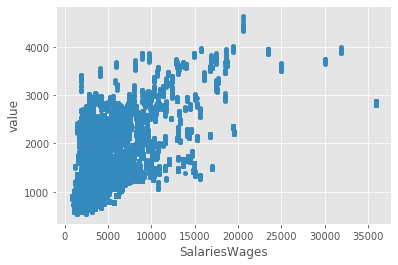

In [186]:
pd.concat([X_train['SalariesWages'], y_train18_2['value']], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


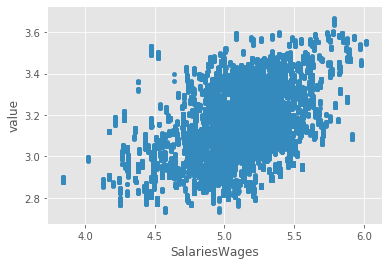

In [335]:
pd.concat([np.log10(X_train['SalariesWages']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


In [188]:
#X_train['TotTaxes'] = (X_train['TotTaxes']*1000)/X_train['total_pop']


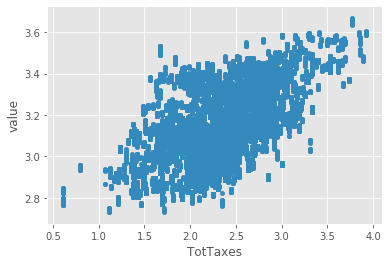

In [189]:
pd.concat([np.log10(X_train['TotTaxes']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='TotTaxes', y='value')


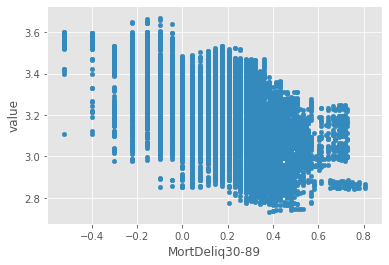

In [53]:
#MortDeliq30-89
pd.concat([np.log10(X_train['MortDeliq30-89']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='MortDeliq30-89', y='value')


In [191]:
train_set = pd.concat([X_train, y_train18['value']], axis=1)

In [192]:
train_set.head()


,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,value
0,2.0,1.222721e+06,1.247542e+06,8087.700338,208.333333,1466.760964,4.1,0.8,0.7,94382.0,0.000442,0.540569,0.090324,0.097815,0.240713,0.5942,68995.0,0.044332,29.4,0.063561,0.027569,0.227130,0.176167,3727.0
1,2.0,8.573410e+05,8.710963e+05,8802.076944,161.666667,666.407524,4.5,0.0,0.0,70103.0,0.000445,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,1735.0
2,2.0,8.573410e+05,8.710963e+05,8802.076944,161.666667,666.407524,5.1,2.2,1.9,70103.0,0.000445,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,1735.0
3,2.0,8.573410e+05,8.710963e+05,8802.076944,161.666667,666.407524,3.8,0.0,0.0,70103.0,0.000445,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,1735.0
4,2.0,2.270603e+06,2.299776e+06,16769.735345,145.000000,4935.854711,4.1,0.8,0.7,61514.0,0.000693,0.720308,0.033488,0.108479,0.109406,0.5630,114641.0,0.053383,23.9,0.047436,0.017541,0.257990,0.245017,3609.0


In [193]:
train_set.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,value
0,2.0,1.222721e+06,1.247542e+06,8087.700338,208.333333,1466.760964,4.1,0.8,0.7,94382.0,0.000442,0.540569,0.090324,0.097815,0.240713,0.5942,68995.0,0.044332,29.4,0.063561,0.027569,0.227130,0.176167,3727.0
1,2.0,8.573410e+05,8.710963e+05,8802.076944,161.666667,666.407524,4.5,0.0,0.0,70103.0,0.000445,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,1735.0
2,2.0,8.573410e+05,8.710963e+05,8802.076944,161.666667,666.407524,5.1,2.2,1.9,70103.0,0.000445,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,1735.0
3,2.0,8.573410e+05,8.710963e+05,8802.076944,161.666667,666.407524,3.8,0.0,0.0,70103.0,0.000445,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,1735.0
4,2.0,2.270603e+06,2.299776e+06,16769.735345,145.000000,4935.854711,4.1,0.8,0.7,61514.0,0.000693,0.720308,0.033488,0.108479,0.109406,0.5630,114641.0,0.053383,23.9,0.047436,0.017541,0.257990,0.245017,3609.0


In [194]:
corr2 = train_set.corr()
corr2

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,value
Season,1.000000,-0.000617,-0.000609,-0.000881,0.000235,0.001057,0.002249,-0.001409,0.018757,-0.000910,0.001013,-0.001412,0.000025,-0.001161,0.002617,0.001553,0.000112,-0.001025,0.004347,-0.002682,-0.005193,-0.000073,0.000992,-0.008546
AGIncome,-0.000617,1.000000,0.999980,0.652783,0.175342,0.684461,-0.033315,0.000642,0.003830,0.345320,-0.202672,0.196404,-0.267182,0.282490,-0.117118,0.129280,0.669513,-0.126474,-0.309895,-0.426642,-0.180916,0.510212,0.511162,0.422737
TotIncome,-0.000609,0.999980,1.000000,0.653982,0.174219,0.685473,-0.033271,0.000263,0.003369,0.344320,-0.202254,0.198013,-0.268040,0.282632,-0.118446,0.130623,0.671468,-0.126750,-0.310163,-0.428806,-0.181398,0.512347,0.513236,0.423550
SalariesWages,-0.000881,0.652783,0.653982,1.000000,-0.164225,0.807314,-0.074624,-0.019529,-0.025653,-0.213795,0.313191,0.326494,-0.305534,0.329640,-0.274833,0.184711,0.943228,-0.075433,-0.510366,-0.604610,-0.255457,0.796097,0.783213,0.512034
NumUnemply,0.000235,0.175342,0.174219,-0.164225,1.000000,-0.089386,0.059195,0.077149,0.079940,0.659568,-0.385430,-0.260670,-0.058392,0.087911,0.360035,-0.277538,-0.180384,-0.192906,0.109237,0.272306,0.055021,-0.250087,-0.267582,0.171270
TotTaxes,0.001057,0.684461,0.685473,0.807314,-0.089386,1.000000,-0.034334,-0.013221,0.011002,-0.127174,0.199842,0.231569,-0.221383,0.269293,-0.206751,0.248537,0.798563,-0.095344,-0.261945,-0.460519,-0.240648,0.550895,0.588973,0.534581
Unemploy-\nment Rate\n(%),0.002249,-0.033315,-0.033271,-0.074624,0.059195,-0.034334,1.000000,0.011791,0.037164,0.057002,-0.016576,-0.048183,0.056815,-0.078053,0.054527,0.051878,-0.076607,0.003012,0.069582,0.095169,0.013225,-0.094822,-0.079000,-0.047680
MortDeliq30-89,-0.001409,0.000642,0.000263,-0.019529,0.077149,-0.013221,0.011791,1.000000,0.920250,0.072311,-0.014612,-0.185596,0.077924,0.018633,0.166165,0.070816,-0.034522,0.046836,0.089939,0.069308,-0.023603,-0.050232,-0.050192,0.070872
MortDeliq90,0.018757,0.003830,0.003369,-0.025653,0.079940,0.011002,0.037164,0.920250,1.000000,0.087311,-0.014884,-0.204250,0.104466,0.046386,0.148830,0.082655,-0.039232,0.019274,0.130368,0.119256,-0.006915,-0.072821,-0.051028,0.134374
total_pop,-0.000910,0.345320,0.344320,-0.213795,0.659568,-0.127174,0.057002,0.072311,0.087311,1.000000,-0.598663,-0.280914,-0.009902,0.099028,0.343499,-0.212865,-0.211611,-0.112219,0.143339,0.122027,-0.003634,-0.219008,-0.223505,0.063537


In [195]:
train_set2 = train_set.copy()

In [196]:
train_set2.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'value'],
      dtype='object')

In [236]:
train_set2.drop(columns = ['total_pop', 'median_age', 'white_pop', 'black_pop',\
                           'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',\
                           'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',\
                           'high_school_diploma', 'associates_degree', 'bachelors_degree',\
                           'masters_degree', 'value'], inplace=True)
train_set2.tail()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90
66883,2.0,21424.666667,21893.0,6438.812785,6.666667,375.277234,5.1,1.9,1.6
66884,2.0,21424.666667,21893.0,6438.812785,6.666667,375.277234,3.8,0.0,0.0
66885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
train_set3 = train_set.copy()

In [239]:
train_set3.drop(columns = ['AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply','TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89','MortDeliq90'], inplace=True)
train_set3.tail()

,Season,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,value
66883,2.0,2555.0,0.01589,0.519374,0.217613,0.111546,0.103327,0.4607,62126.0,0.076183,27.8,0.032094,0.040705,0.235616,0.18317,1420.0
66884,2.0,2555.0,0.01589,0.519374,0.217613,0.111546,0.103327,0.4607,62126.0,0.076183,27.8,0.032094,0.040705,0.235616,0.18317,1420.0
66885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
# convert all columns of DataFrame
train_set3 = train_set3.apply(pd.to_numeric) # convert all columns of DataFrame

In [241]:
train_set3.corr()

,Season,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,value
Season,1.000000,-0.000910,0.001013,-0.001412,0.000025,-0.001161,0.002617,0.001553,0.000112,-0.001025,0.004347,-0.002682,-0.005193,-0.000073,0.000992,-0.008546
total_pop,-0.000910,1.000000,-0.598663,-0.280914,-0.009902,0.099028,0.343499,-0.212865,-0.211611,-0.112219,0.143339,0.122027,-0.003634,-0.219008,-0.223505,0.063537
median_age,0.001013,-0.598663,1.000000,0.178874,-0.016728,-0.023321,-0.199840,0.099684,0.296022,0.134508,-0.152313,-0.101364,0.036122,0.252524,0.232786,0.039622
white_pop,-0.001412,-0.280914,0.178874,1.000000,-0.601149,-0.139705,-0.638516,0.007232,0.420079,-0.110977,-0.444826,-0.220548,0.209441,0.463877,0.400459,-0.096904
black_pop,0.000025,-0.009902,-0.016728,-0.601149,1.000000,-0.230349,-0.097783,0.220703,-0.338623,0.261704,0.380221,0.226999,-0.037849,-0.351175,-0.271047,-0.223316
asian_pop,-0.001161,0.099028,-0.023321,-0.139705,-0.230349,1.000000,-0.078008,-0.048272,0.309543,-0.162688,-0.100722,-0.360504,-0.145793,0.335483,0.402084,0.466983
hispanic_pop,0.002617,0.343499,-0.199840,-0.638516,-0.097783,-0.078008,1.000000,-0.174456,-0.350267,-0.031314,0.283543,0.252062,-0.165415,-0.408966,-0.437388,0.128134
gini_index,0.001553,-0.212865,0.099684,0.007232,0.220703,-0.048272,-0.174456,1.000000,0.220260,0.141546,0.232089,-0.254937,-0.332681,0.167803,0.183979,0.066607
income_per_capita,0.000112,-0.211611,0.296022,0.420079,-0.338623,0.309543,-0.350267,0.220260,1.000000,-0.101927,-0.518549,-0.647599,-0.233670,0.859896,0.856809,0.507090
vacant_housing_units_for_rent,-0.001025,-0.112219,0.134508,-0.110977,0.261704,-0.162688,-0.031314,0.141546,-0.101927,1.000000,0.114813,0.098623,0.102911,-0.121299,-0.130991,-0.290201


In [242]:
train_set3 = train_set3.dropna(subset=['value'])

In [243]:
#sns.pairplot(train_set3)

In [ ]:
train_set2 = train_set2.dropna(subset=['value'])

In [96]:
train_set2.shape

(54614, 10)

In [244]:
#sns.pairplot(train_set2)

In [245]:
corr['value'].sort_values(ascending=False)

value                            1.000000
TotTaxes                         0.515373
income_per_capita                0.507090
asian_pop                        0.466983
SalariesWages                    0.444746
masters_degree                   0.443502
TotIncome                        0.423550
AGIncome                         0.422737
bachelors_degree                 0.394906
NumUnemply                       0.171270
MortDeliq90                      0.134374
hispanic_pop                     0.128134
MortDeliq30-89                   0.070872
gini_index                       0.066607
total_pop                        0.063537
median_age                       0.039622
Season                          -0.008546
percent_income_spent_on_rent    -0.047478
Unemploy-\nment Rate\n(%)       -0.047680
white_pop                       -0.096904
black_pop                       -0.223316
associates_degree               -0.242445
vacant_housing_units_for_rent   -0.290201
high_school_diploma             -0

# Test Data

In [835]:
# X_test18 = pd.merge(ZRI_IRS_LF_MD_18, ACS_18, on=['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Year-Month', 'value', 'Year'], how='left')
X_test18 = pd.merge(ZRI_IRS_LF_MD_18, ACS2018, right_on=['geo_id'], left_on =['ZIPCODE'], how='left')



In [836]:
#dropping duplicates 
X_test18 = X_test18.drop_duplicates()
X_test18.shape #checking shape

(25968, 40)

In [837]:
#making season ordinal 
X_test18.Season = X_test18.Season.replace({'fall':1,'winter':2, 'summer':3, 'spring':4})

In [838]:
X_test18.head()

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2018-01-01,3727.0,1,2018,2,1.338135e+06,1.362983e+06,8.031643e+05,198.333333,17238.333333,36061,"914,163","880,074","34,089",3.7,0.9,0.7,10025,92805.0,41.3,0.546037,0.099100,0.089122,0.234212,0.5968,72802.0,0.045678,28.2,0.061936,0.026087,0.216281,0.167114,6.919867,3.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2018-01-01,1735.0,1,2018,2,9.383310e+05,9.521218e+05,6.570033e+05,131.666667,13979.833333,17031,"2,602,134","2,494,216","107,918",4.1,2.1,1.6,60657,70052.0,31.2,0.805002,0.025281,0.068977,0.069962,0.4956,73513.0,0.046661,25.4,0.030049,0.025824,0.363173,0.168346,0.807234,3.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2018-01-01,3609.0,1,2018,2,2.065178e+06,2.094322e+06,1.032039e+06,148.333333,25736.000000,36061,"914,163","880,074","34,089",3.7,0.9,0.7,10023,62435.0,43.3,0.724626,0.037607,0.106303,0.105101,0.5604,119276.0,0.050869,24.0,0.046673,0.018419,0.262305,0.243661,2.592348,3.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2018-01-01,1214.0,1,2018,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,48157,"386,546","371,320","15,226",3.9,NaN,NaN,77494,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0
4,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2018-01-01,1214.0,1,2018,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,48201,"2,286,360","2,186,339","100,021",4.4,1.7,1.1,77494,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0


In [839]:
X_test['AGIncome'] = (X_test['AGIncome']*1000)/X_test['total_pop']
X_test['TotIncome'] = (X_test['TotIncome']*1000)/X_test['total_pop']
X_test['SalariesWages'] = (X_test['SalariesWages']*1000)/X_test['total_pop']
X_test['NumUnemply'] = (X_test['NumUnemply']*1000)/X_test['total_pop']
X_test['TotTaxes'] = (X_test['TotTaxes']*1000)/X_test['total_pop']

In [840]:
X_test = X_test.replace(np.nan, 0)

In [841]:
#drop columns to test
X_test18.drop(columns = ['City', 'State', 'value', 'Metro', 'CountyName','Month', 'Year','geo_id'], inplace=True)
X_test18.drop(columns = ['Labor\nForce','Employed', 'Unemployed','SizeRank'], inplace=True)

X_test18.drop(columns = ['Year-Month'], inplace=True)


X_test18.columns

Index(['ZIPCODE', 'Season', 'AGIncome', 'TotIncome', 'SalariesWages',
       'NumUnemply', 'TotTaxes', 'FIPSCode', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'total_pop', 'median_age', 'white_pop',
       'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'population_change', 'natural_amenity_rank'],
      dtype='object')

In [842]:
X_test18.drop(columns = ['ZIPCODE', 'FIPSCode'], inplace=True)

In [843]:
X_test18.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'population_change', 'natural_amenity_rank'],
      dtype='object')

In [844]:
y_test19 = ZRI_IRS_LF_MD_19['value']

In [845]:
X_test18.shape

(25968, 25)

In [846]:
X_test18.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
0,2,1.338135e+06,1.362983e+06,8.031643e+05,198.333333,17238.333333,3.7,0.9,0.7,92805.0,41.3,0.546037,0.099100,0.089122,0.234212,0.5968,72802.0,0.045678,28.2,0.061936,0.026087,0.216281,0.167114,6.919867,3.0
1,2,9.383310e+05,9.521218e+05,6.570033e+05,131.666667,13979.833333,4.1,2.1,1.6,70052.0,31.2,0.805002,0.025281,0.068977,0.069962,0.4956,73513.0,0.046661,25.4,0.030049,0.025824,0.363173,0.168346,0.807234,3.0
2,2,2.065178e+06,2.094322e+06,1.032039e+06,148.333333,25736.000000,3.7,0.9,0.7,62435.0,43.3,0.724626,0.037607,0.106303,0.105101,0.5604,119276.0,0.050869,24.0,0.046673,0.018419,0.262305,0.243661,2.592348,3.0
3,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,3.9,NaN,NaN,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0
4,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,4.4,1.7,1.1,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0


In [847]:
X_test18.shape

(25968, 25)

In [848]:
y_test19.head()

207744    3509.0
207745    1723.0
207746    3515.0
207747    1255.0
207748    1255.0
Name: value, dtype: float64

In [849]:
y_test19 = y_test19.reset_index()


In [850]:
y_test19

,index,value
0,207744,3509.0
1,207745,1723.0
2,207746,3515.0
3,207747,1255.0
4,207748,1255.0
5,207749,1255.0
6,207750,1872.0
7,207751,NaN
8,207752,3441.0
9,207753,1326.0


In [851]:
y_test19 = y_test19.drop(columns = ['index'])

In [852]:
y_test19.head()

,value
0,3509.0
1,1723.0
2,3515.0
3,1255.0
4,1255.0


In [853]:
y_test19.shape

(25968, 1)

In [854]:
testset1 = pd.concat([X_test18, y_test19], axis=1)

In [855]:
testset1.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank,value
0,2,1.338135e+06,1.362983e+06,8.031643e+05,198.333333,17238.333333,3.7,0.9,0.7,92805.0,41.3,0.546037,0.099100,0.089122,0.234212,0.5968,72802.0,0.045678,28.2,0.061936,0.026087,0.216281,0.167114,6.919867,3.0,3509.0
1,2,9.383310e+05,9.521218e+05,6.570033e+05,131.666667,13979.833333,4.1,2.1,1.6,70052.0,31.2,0.805002,0.025281,0.068977,0.069962,0.4956,73513.0,0.046661,25.4,0.030049,0.025824,0.363173,0.168346,0.807234,3.0,1723.0
2,2,2.065178e+06,2.094322e+06,1.032039e+06,148.333333,25736.000000,3.7,0.9,0.7,62435.0,43.3,0.724626,0.037607,0.106303,0.105101,0.5604,119276.0,0.050869,24.0,0.046673,0.018419,0.262305,0.243661,2.592348,3.0,3515.0
3,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,3.9,NaN,NaN,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0,1255.0
4,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,4.4,1.7,1.1,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0,1255.0


In [856]:
testset1 = testset1.dropna(subset=['value'])


In [857]:
testset1.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank,value
0,2,1.338135e+06,1.362983e+06,8.031643e+05,198.333333,17238.333333,3.7,0.9,0.7,92805.0,41.3,0.546037,0.099100,0.089122,0.234212,0.5968,72802.0,0.045678,28.2,0.061936,0.026087,0.216281,0.167114,6.919867,3.0,3509.0
1,2,9.383310e+05,9.521218e+05,6.570033e+05,131.666667,13979.833333,4.1,2.1,1.6,70052.0,31.2,0.805002,0.025281,0.068977,0.069962,0.4956,73513.0,0.046661,25.4,0.030049,0.025824,0.363173,0.168346,0.807234,3.0,1723.0
2,2,2.065178e+06,2.094322e+06,1.032039e+06,148.333333,25736.000000,3.7,0.9,0.7,62435.0,43.3,0.724626,0.037607,0.106303,0.105101,0.5604,119276.0,0.050869,24.0,0.046673,0.018419,0.262305,0.243661,2.592348,3.0,3515.0
3,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,3.9,NaN,NaN,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0,1255.0
4,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,4.4,1.7,1.1,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0,1255.0


In [858]:
X_test18.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
0,2,1.338135e+06,1.362983e+06,8.031643e+05,198.333333,17238.333333,3.7,0.9,0.7,92805.0,41.3,0.546037,0.099100,0.089122,0.234212,0.5968,72802.0,0.045678,28.2,0.061936,0.026087,0.216281,0.167114,6.919867,3.0
1,2,9.383310e+05,9.521218e+05,6.570033e+05,131.666667,13979.833333,4.1,2.1,1.6,70052.0,31.2,0.805002,0.025281,0.068977,0.069962,0.4956,73513.0,0.046661,25.4,0.030049,0.025824,0.363173,0.168346,0.807234,3.0
2,2,2.065178e+06,2.094322e+06,1.032039e+06,148.333333,25736.000000,3.7,0.9,0.7,62435.0,43.3,0.724626,0.037607,0.106303,0.105101,0.5604,119276.0,0.050869,24.0,0.046673,0.018419,0.262305,0.243661,2.592348,3.0
3,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,3.9,NaN,NaN,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0
4,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,4.4,1.7,1.1,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0


In [859]:
X_test = testset1.drop(columns = ['value'])
#X_test = X_test18.copy()

In [860]:
y_test = testset1['value']
#y_test = y_test19.copy()

In [861]:
X_test.shape

(21976, 25)

In [862]:
y_test.shape

(21976,)

In [863]:
#replace nan with 0 
X_test = X_test.replace(np.nan, 0)
#y_test = y_test.replace(np.nan, 0)

In [864]:
X_test.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
0,2,1.338135e+06,1.362983e+06,8.031643e+05,198.333333,17238.333333,3.7,0.9,0.7,92805.0,41.3,0.546037,0.099100,0.089122,0.234212,0.5968,72802.0,0.045678,28.2,0.061936,0.026087,0.216281,0.167114,6.919867,3.0
1,2,9.383310e+05,9.521218e+05,6.570033e+05,131.666667,13979.833333,4.1,2.1,1.6,70052.0,31.2,0.805002,0.025281,0.068977,0.069962,0.4956,73513.0,0.046661,25.4,0.030049,0.025824,0.363173,0.168346,0.807234,3.0
2,2,2.065178e+06,2.094322e+06,1.032039e+06,148.333333,25736.000000,3.7,0.9,0.7,62435.0,43.3,0.724626,0.037607,0.106303,0.105101,0.5604,119276.0,0.050869,24.0,0.046673,0.018419,0.262305,0.243661,2.592348,3.0
3,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,3.9,0.0,0.0,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0
4,2,1.056339e+06,1.065394e+06,8.502032e+05,196.666667,13483.833333,4.4,1.7,1.1,114989.0,34.9,0.484420,0.076581,0.195714,0.216499,0.3801,50717.0,0.064355,26.2,0.054031,0.041143,0.221917,0.113602,5.879801,3.0


In [865]:
y_test.head()

0    3509.0
1    1723.0
2    3515.0
3    1255.0
4    1255.0
Name: value, dtype: float64

In [866]:
X_test.shape

(21976, 25)

In [867]:
y_test.shape

(21976,)

In [868]:
X_test.columns[X_test.isnull().any()]


Index([], dtype='object')

In [869]:
X_train.shape

(21718, 25)

In [870]:
#Pickle CSV
X_train.to_pickle('./data/X_train.pkl')

In [871]:
y_train.to_pickle('./data/y_train.pkl')

In [872]:
X_test.to_pickle('./data/X_test.pkl')

In [873]:
y_test.to_pickle('./data/y_test.pkl')

# Gradient Boost

In [874]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [875]:
gbm = GradientBoostingRegressor()

gbm.set_params(n_estimators = 1000, 
            learning_rate = .1, #.3,
            max_depth = 3, #2,
            min_samples_leaf = 3)

gbm.fit(X_train,y_train)

print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,y_test)))

--------------------------------------------------
The train set R^2 is 0.990


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Grid Search for Gradient Boost

In [769]:
X_train.head()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,population_change,natural_amenity_rank
0,2.0,1.222721e+06,1.247542e+06,7.633333e+05,208.333333,138435.833333,4.1,0.8,0.7,94382.0,41.7,0.540569,0.090324,0.097815,0.240713,0.5942,68995.0,0.044332,29.4,0.063561,0.027569,0.227130,0.176167,3.516101,3.0
1,2.0,8.573410e+05,8.710963e+05,6.170520e+05,161.666667,46717.166667,5.1,2.2,1.9,70103.0,31.2,0.810379,0.028273,0.065603,0.067843,0.4959,69983.0,0.050289,25.5,0.032352,0.026803,0.367145,0.168951,2.035550,3.0
2,2.0,2.270603e+06,2.299776e+06,1.031574e+06,145.000000,303624.166667,4.1,0.8,0.7,61514.0,42.6,0.720308,0.033488,0.108479,0.109406,0.5630,114641.0,0.053383,23.9,0.047436,0.017541,0.257990,0.245017,1.228203,3.0
3,2.0,1.021157e+06,1.032314e+06,8.244232e+05,300.000000,51148.166667,4.6,0.0,0.0,105854.0,34.8,0.511828,0.071570,0.180296,0.210082,0.3699,48249.0,0.057867,26.5,0.051911,0.042341,0.223761,0.111106,0.922800,3.0
4,2.0,1.021157e+06,1.032314e+06,8.244232e+05,300.000000,51148.166667,5.1,3.5,1.7,105854.0,34.8,0.511828,0.071570,0.180296,0.210082,0.3699,48249.0,0.057867,26.5,0.051911,0.042341,0.223761,0.111106,0.922800,3.0


In [148]:
y_train.head()

0      3727.0
129    1735.0
134    1735.0
360    1735.0
366    3609.0
Name: value, dtype: float64

In [221]:
# n_estimator: 

x = np.logspace(1, 4, 100)
x = x.astype(np.int64)

In [343]:
param_grid={'max_depth':[3, 5],
            'min_samples_leaf':[3, 5]}

grid_search = GridSearchCV(estimator= gbm, param_grid= param_grid)
%time grid_search.fit(X_train,y_train)

CPU times: user 44min 23s, sys: 26.7 s, total: 44min 50s
Wall time: 47min 19s


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=3,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000,
                                                 n_iter_no_change=None,
             

In [344]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'max_depth': 5, 'min_samples_leaf': 3}
0.9775594302758929


In [345]:
gbm.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [346]:
sorted(zip(X_train.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)

AttributeError: 'NoneType' object has no attribute 'tree_'

In [470]:
#Random Forrest
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

randomForest.set_params(random_state=42, max_depth = 3, min_samples_split = 2, n_estimators=1000, max_features =4)

print(randomForest.fit(X_train,y_train))


print(randomForest.score(X_train,y_train))
randomForest.score(X_test,y_test)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
0.4782371253589495


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
feature_importance = list(zip(X_train.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')
